# Data Processing

In [1]:
import pandas as pd
df = pd.read_csv('P639_DATASET.csv')
print(df.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100


In [2]:
print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [3]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

print("\nDataFrame after Date conversion and index setting:")
print(df.head())


DataFrame after Date conversion and index setting:
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100


In [5]:
# Check for Stationarity
from statsmodels.tsa.stattools import adfuller

# Select the 'Close' column for stationarity testing
time_series = df['Close']

# Perform Augmented Dickey-Fuller test
result = adfuller(time_series)

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if result[1] <= 0.05:
    print("\nConclusion: The p-value is less than or equal to 0.05, and the test statistic is more negative than the critical values. We reject the null hypothesis (H0). The time series is likely stationary.")
else:
    print("\nConclusion: The p-value is greater than 0.05, or the test statistic is not more negative than the critical values. We fail to reject the null hypothesis (H0). The time series is likely non-stationary.")

ADF Statistic: 1.219370
p-value: 0.996117
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568

Conclusion: The p-value is greater than 0.05, or the test statistic is not more negative than the critical values. We fail to reject the null hypothesis (H0). The time series is likely non-stationary.


In [6]:
# Data Transformation for Stationarity
df_diff = df['Close'].diff().dropna()
print("Differenced Series (first 5 rows):")
print(df_diff.head())

Differenced Series (first 5 rows):
Date
2012-01-04    0.315716
2012-01-05    0.655712
2012-01-06    0.624286
2012-01-09   -0.095714
2012-01-10    0.215713
Name: Close, dtype: float64


In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(df_diff)

# Print the results
print('ADF Statistic (Differenced Series): %f' % result_diff[0])
print('p-value (Differenced Series): %f' % result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if result_diff[1] <= 0.05:
    print("\nConclusion (Differenced Series): The p-value is less than or equal to 0.05, and the test statistic is more negative than the critical values. We reject the null hypothesis (H0). The differenced time series is likely stationary.")
else:
    print("\nConclusion (Differenced Series): The p-value is greater than 0.05, or the test statistic is not more negative than the critical values. We fail to reject the null hypothesis (H0). The differenced time series is likely non-stationary.")

ADF Statistic (Differenced Series): -13.625534
p-value (Differenced Series): 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568

Conclusion (Differenced Series): The p-value is less than or equal to 0.05, and the test statistic is more negative than the critical values. We reject the null hypothesis (H0). The differenced time series is likely stationary.


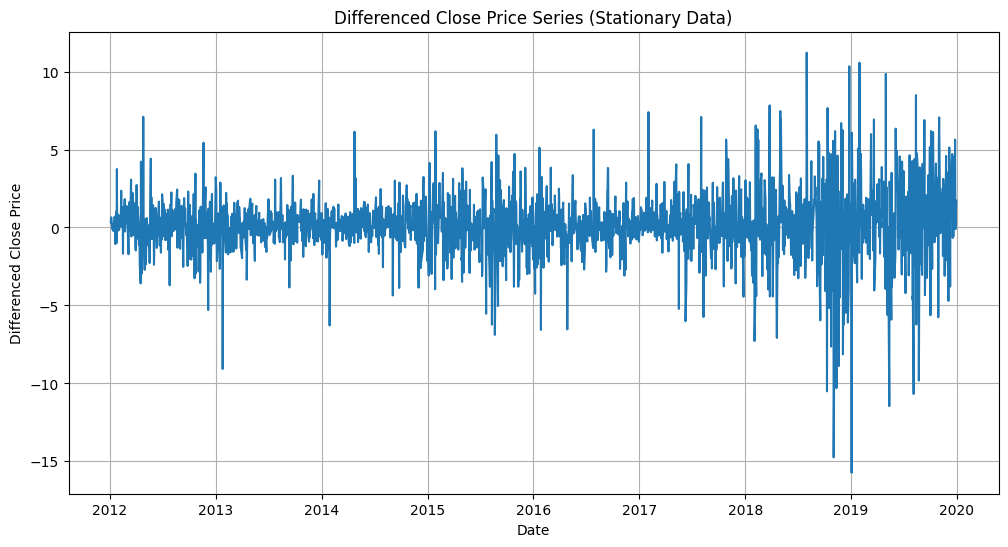

In [8]:
# Visualize Stationary Data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_diff)
plt.title('Differenced Close Price Series (Stationary Data)')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.grid(True)
plt.show()

# EDA

In [9]:
print("Descriptive Statistics for Numerical Columns:")
print(df.describe())

Descriptive Statistics for Numerical Columns:
              Open         High          Low        Close    Adj Close  \
count  2011.000000  2011.000000  2011.000000  2011.000000  2011.000000   
mean    126.707469   127.827594   125.580258   126.741235   119.505548   
std      50.483753    50.926301    50.124940    50.578369    52.438444   
min      55.424286    57.085712    55.014286    55.790001    48.921928   
25%      85.882858    86.717858    85.056427    86.202145    75.056679   
50%     113.050003   114.190002   111.870003   113.050003   105.222908   
75%     165.190002   167.409996   163.424995   165.245002   160.047111   
max     291.119995   293.970001   288.119995   291.519989   289.522614   

             Volume  
count  2.011000e+03  
mean   5.949670e+07  
std    4.683856e+07  
min    1.136200e+07  
25%    2.758565e+07  
50%    4.346900e+07  
75%    7.471030e+07  
max    3.765300e+08  


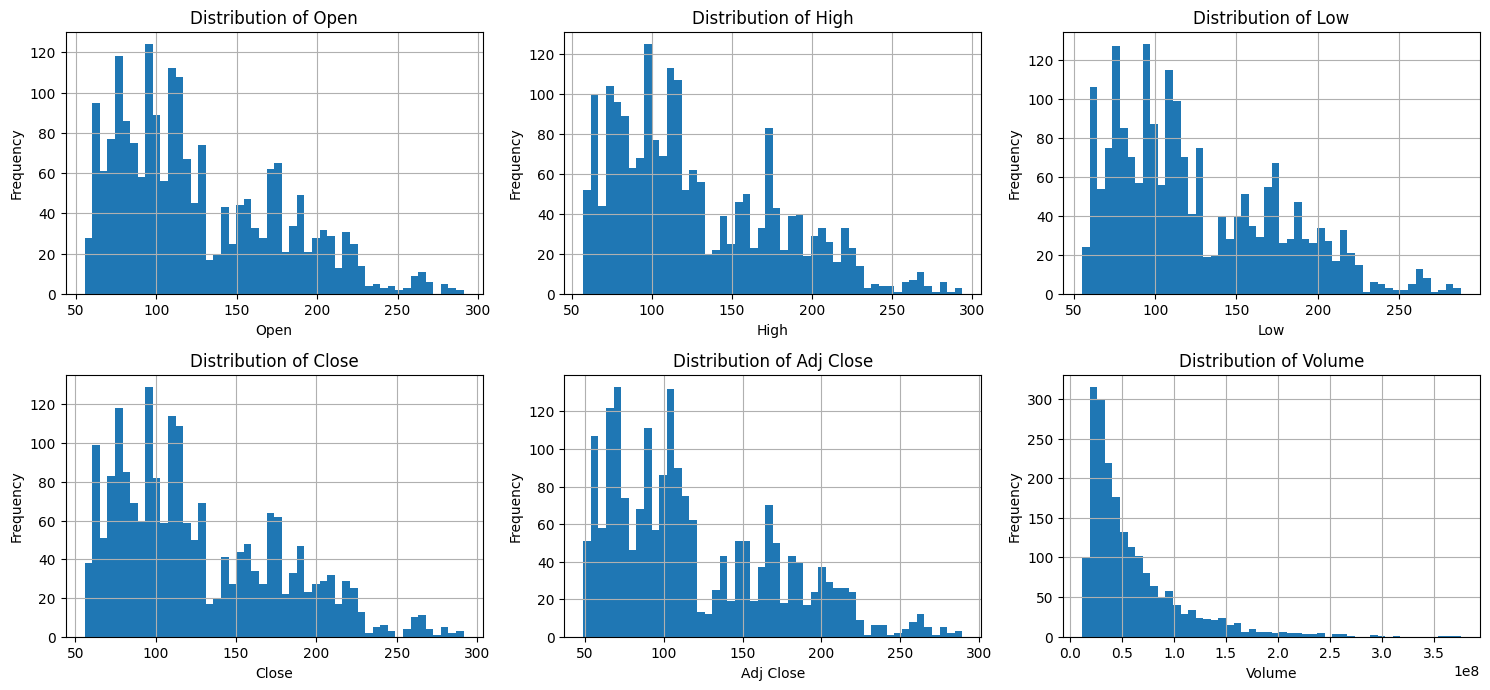

In [10]:
# Histogram 
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Generate histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    df[col].hist(bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


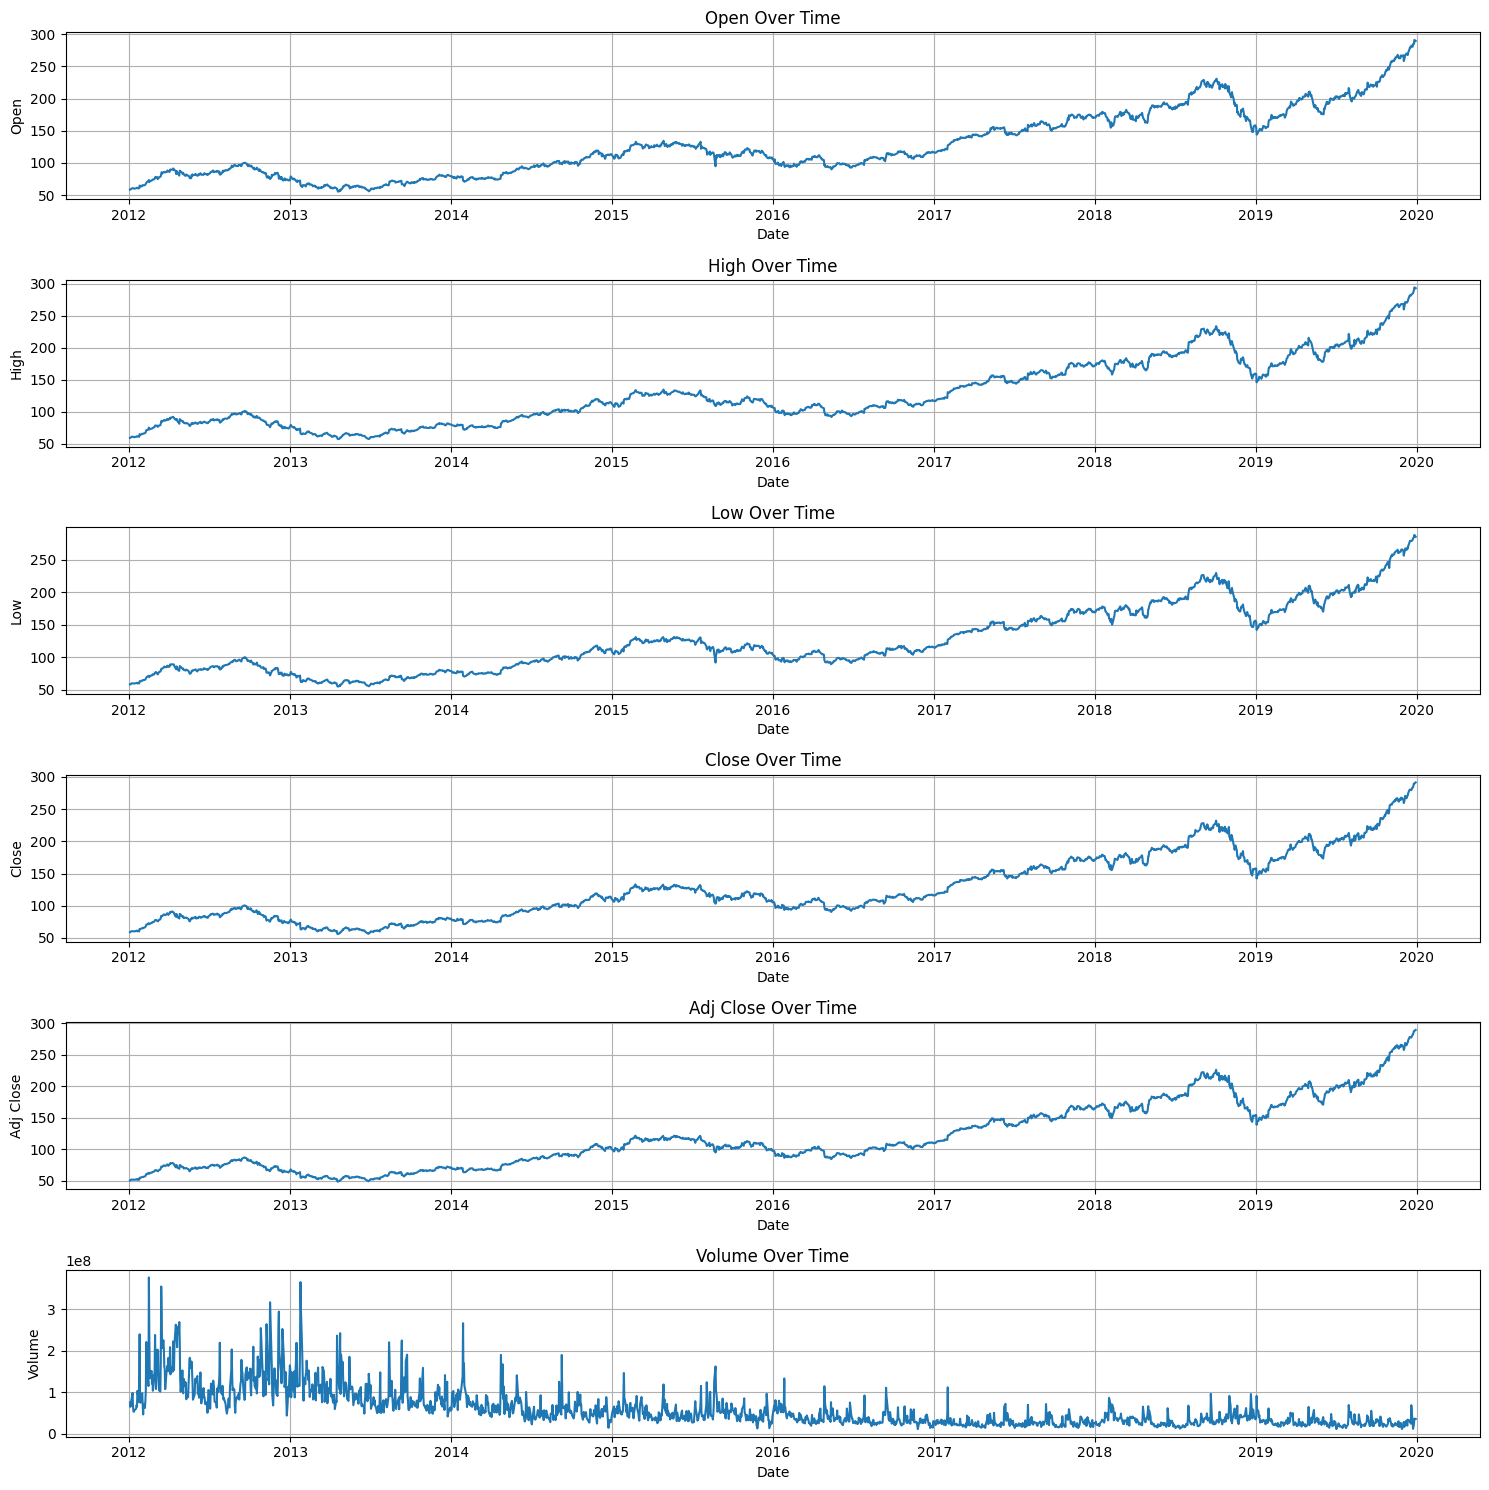

In [11]:
# Time Series Trends
import matplotlib.pyplot as plt

# Define the columns to plot
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Create subplots for each column
plt.figure(figsize=(15, 15))

for i, col in enumerate(columns_to_plot):
    plt.subplot(len(columns_to_plot), 1, i + 1)  # One column per subplot vertically
    plt.plot(df.index, df[col])
    plt.title(f'{col} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.grid(True)

plt.tight_layout()
plt.show()


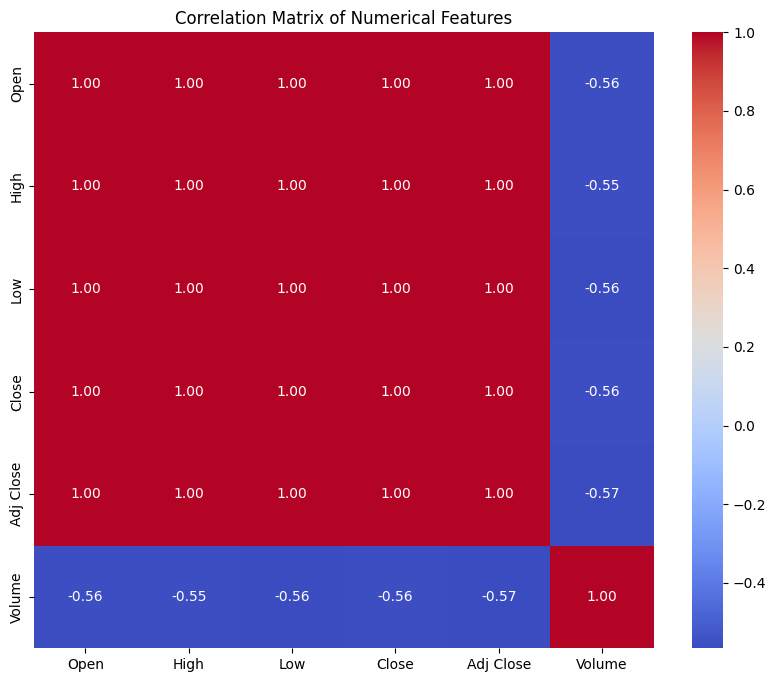

In [12]:
#  Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [13]:
# Decompose time series
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal_decompose to the 'Close' column
# Using 'additive' model and a period of 252 for yearly seasonality in daily stock data
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)

print("Time series decomposition performed.")

Time series decomposition performed.


<Figure size 1200x1000 with 0 Axes>

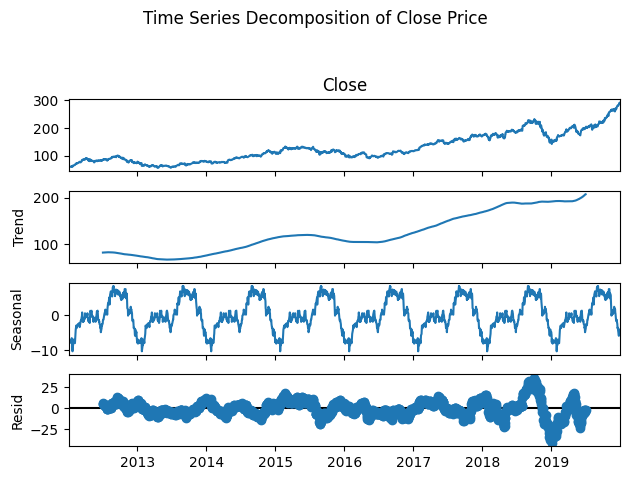

In [14]:
import matplotlib.pyplot as plt

# Plot the decomposed components
plt.figure(figsize=(12, 10))
decomposition.plot()
plt.suptitle('Time Series Decomposition of Close Price', y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap
plt.show()

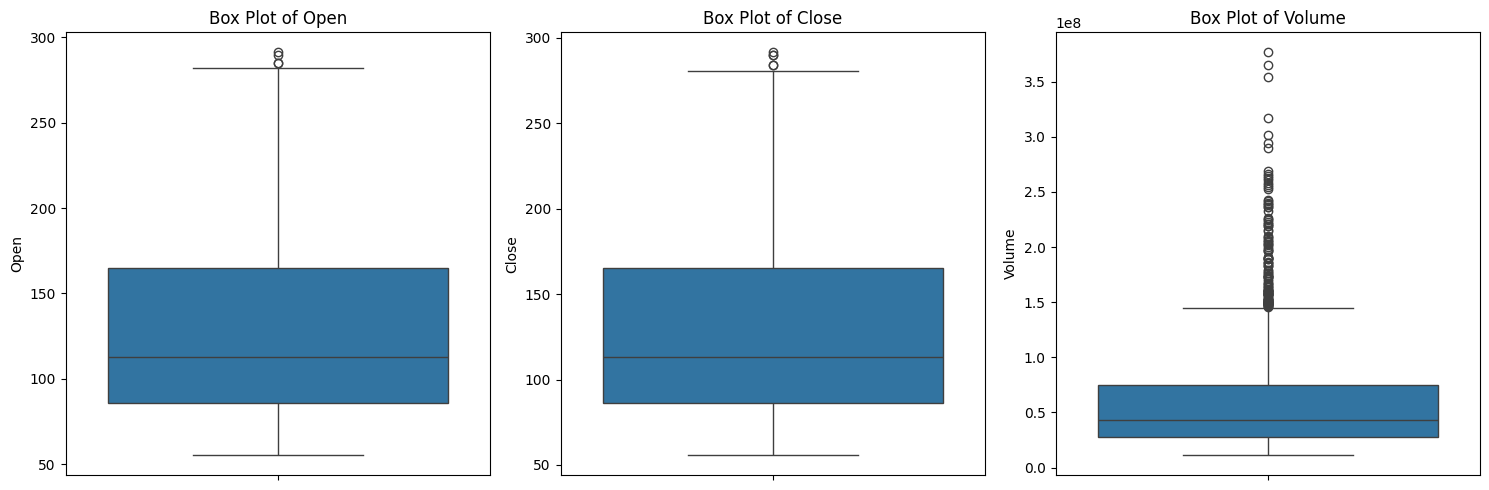

In [15]:
# Visualize Data Distributions with Box Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns for which you want to create box plots
columns_for_box_plot = ['Open', 'Close', 'Volume']

# Create a figure with a suitable size to accommodate multiple box plots
plt.figure(figsize=(15, 5))

# For each selected numerical column, generate a box plot
for i, col in enumerate(columns_for_box_plot):
    plt.subplot(1, len(columns_for_box_plot), i + 1) # Arrange plots in a single row
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

# Display the plots
plt.tight_layout()
plt.show()

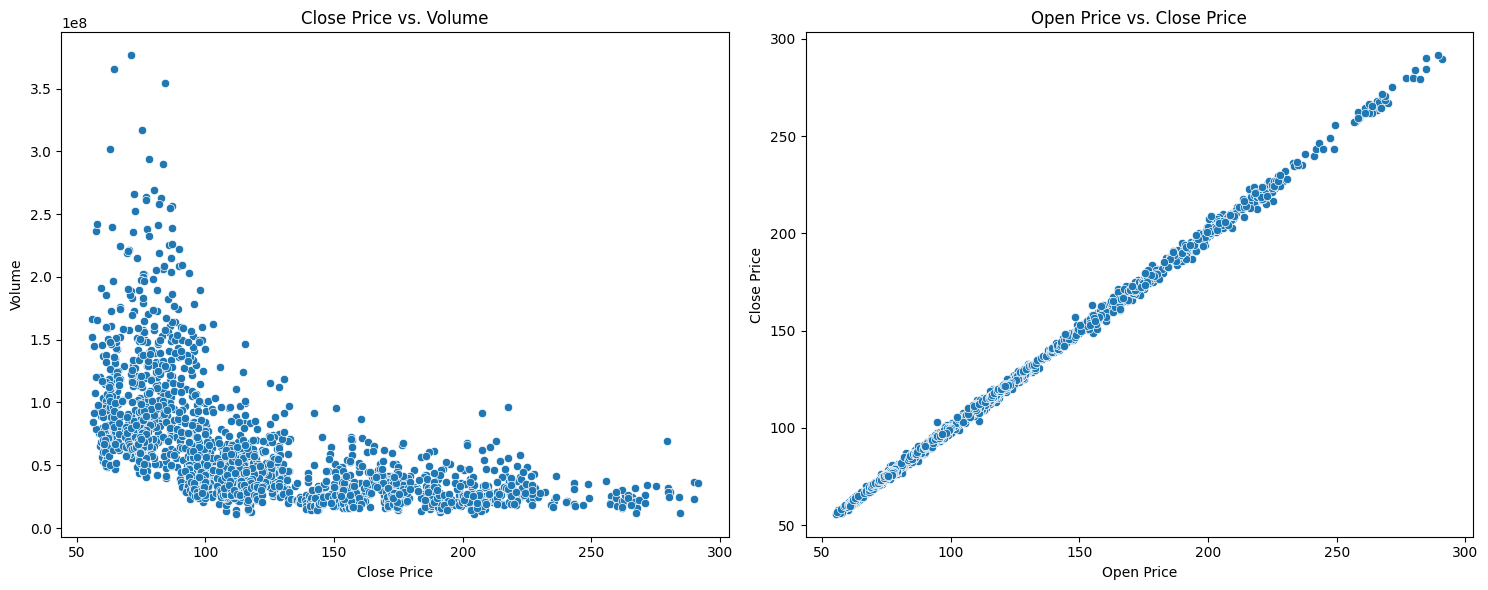

In [16]:
# Explore Relationships with Scatterplots
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a suitable size to accommodate multiple scatterplots
plt.figure(figsize=(15, 6))

# Scatterplot: 'Close' price vs. 'Volume'
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(x=df['Close'], y=df['Volume'])
plt.title('Close Price vs. Volume')
plt.xlabel('Close Price')
plt.ylabel('Volume')

# Scatterplot: 'Open' price vs. 'Close' price
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(x=df['Open'], y=df['Close'])
plt.title('Open Price vs. Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the plots
plt.show()

In [17]:
# Visualize Aggregated Data with Bar Plots
df['Year'] = df.index.year
avg_close_per_year = df.groupby('Year')['Close'].mean()

print("Average Close Price per Year:")
print(avg_close_per_year.head())

Average Close Price per Year:
Year
2012     82.292817
2013     67.519269
2014     92.264654
2015    120.040000
2016    104.604008
Name: Close, dtype: float64


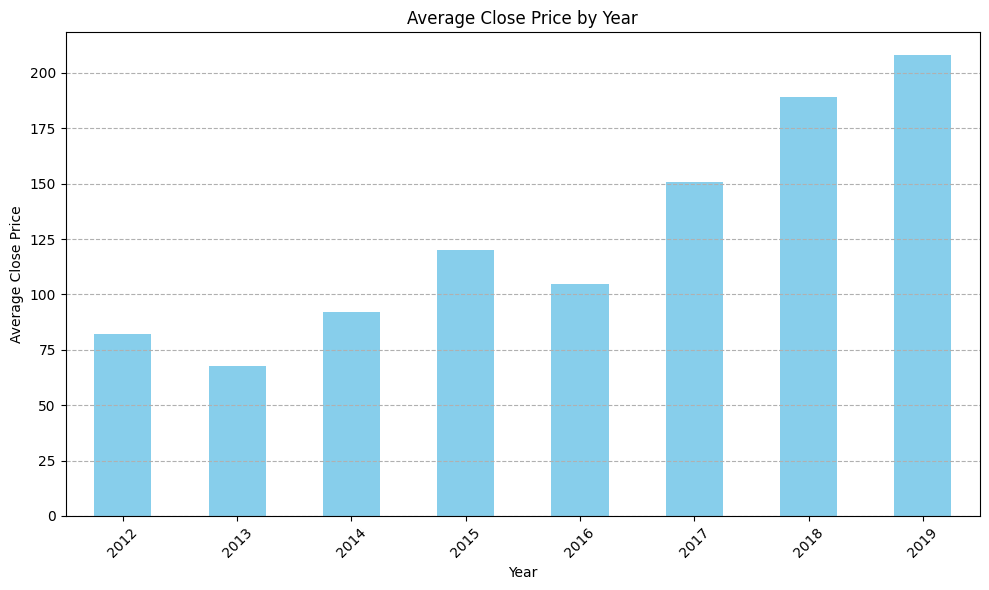

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
avg_close_per_year.plot(kind='bar', color='skyblue')
plt.title('Average Close Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [19]:
# Visualize Proportions with Pie Charts
import matplotlib.pyplot as plt
import numpy as np

# Calculate daily price change
df['Daily_Change'] = df['Close'].diff()

# Categorize daily changes
df['Change_Category'] = df['Daily_Change'].apply(lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No Change'))

# Get the counts for each category
change_counts = df['Change_Category'].value_counts()

print("Daily Change Categories and Counts:")
print(change_counts.head())


Daily Change Categories and Counts:
Change_Category
Increase     1053
Decrease      954
No Change       4
Name: count, dtype: int64


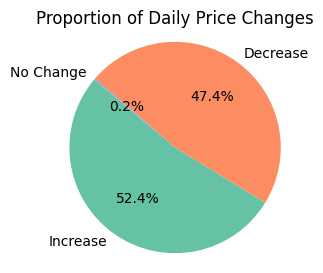

In [20]:
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(change_counts, labels=change_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5','#fc8d62','#8da0cb'])
plt.title('Proportion of Daily Price Changes')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Feature Engineering

In [21]:
# Create Lagged Features
df['Close_Lag1'] = df['Close'].shift(1)
df['Close_Lag2'] = df['Close'].shift(2)
df['Close_Lag3'] = df['Close'].shift(3)

print("DataFrame with lagged 'Close' prices:")
print(df.head())

DataFrame with lagged 'Close' prices:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200   
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500   
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100   

            Year  Daily_Change Change_Category  Close_Lag1  Close_Lag2  \
Date                                                                     
2012-01-03  2012           NaN       No Change         NaN         NaN   
2012-01-04  2012      0.315716        Increase   58.747143         NaN   
2012-01-05  2012      0.655712        Increase   59.062859   58.747143   
2012-01-06  2012      0.624286        

In [22]:
df['Close_RollingMean_7'] = df['Close'].rolling(window=7).mean()
df['Close_RollingStd_7'] = df['Close'].rolling(window=7).std()

print("DataFrame with rolling mean and standard deviation:")
print(df.head(10))

DataFrame with rolling mean and standard deviation:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200   
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500   
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100   
2012-01-10  60.844284  60.857143  60.214287  60.462856  52.248333  64549100   
2012-01-11  60.382858  60.407143  59.901428  60.364285  52.163139  53771200   
2012-01-12  60.325714  60.414288  59.821430  60.198570  52.019955  53146800   
2012-01-13  59.957142  60.064285  59.808571  59.972858  51.824898  56505400   
2012-01-17  60.599998  60.855713  60.422855  60.671429  52.428562  60724300   


In [23]:
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter

print("DataFrame with time-based features:")
print(df.head())

DataFrame with time-based features:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-01-03  58.485714  58.928570  58.428570  58.747143  50.765709  75555200   
2012-01-04  58.571430  59.240002  58.468571  59.062859  51.038536  65005500   
2012-01-05  59.278572  59.792858  58.952858  59.718571  51.605175  67817400   
2012-01-06  59.967144  60.392857  59.888573  60.342857  52.144630  79573200   
2012-01-09  60.785713  61.107143  60.192856  60.247143  52.061932  98506100   

            Year  Daily_Change Change_Category  Close_Lag1  Close_Lag2  \
Date                                                                     
2012-01-03  2012           NaN       No Change         NaN         NaN   
2012-01-04  2012      0.315716        Increase   58.747143         NaN   
2012-01-05  2012      0.655712        Increase   59.062859   58.747143   
2012-01-06  2012      0.624286        In

# Model Building and Evaluation

In [24]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: C:\Users\Shri\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [25]:
#Imports and data loading
# =========================
# Model Building & Evaluation – Stock Market Analysis
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Stats models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Scaling
from sklearn.preprocessing import MinMaxScaler

# Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prophet
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")


C:\Users\Shri\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Shri\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\Shri\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/

In [26]:
# Load & Prepare Dataset
df = pd.read_csv("P639_DATASET.csv")

# Convert date column
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Target variable
target = 'Close'

# Train-test split (80-20)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]


In [27]:
# Evaluation Metrics Function
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        "Model": model_name,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape
    }


In [28]:
# ARIMA Model
arima_model = ARIMA(train[target], order=(5,1,0))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=len(test))

arima_results = evaluate_model(test[target], arima_forecast, "ARIMA")


In [29]:
# SARIMA Model
sarima_model = SARIMAX(
    train[target],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=len(test))

sarima_results = evaluate_model(test[target], sarima_forecast, "SARIMA")


In [30]:
# Feature Engineering for ML Models (Lag Features)
def create_lag_features(data, lags=5):
    df_lag = data.copy()
    for lag in range(1, lags + 1):
        df_lag[f'lag_{lag}'] = df_lag[target].shift(lag)
    df_lag.dropna(inplace=True)
    return df_lag

lagged_df = create_lag_features(df)

X = lagged_df.drop(columns=[target])
y = lagged_df[target]

X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [31]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_results = evaluate_model(y_test, lr_pred, "Linear Regression")


In [32]:
# Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_results = evaluate_model(y_test, rf_pred, "Random Forest")


In [33]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

gb_results = evaluate_model(y_test, gb_pred, "Gradient Boosting")


In [34]:
# LSTM Model
# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[[target]])

def create_lstm_data(data, time_steps=10):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_lstm_data(scaled_data)

split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Reshape
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# Build model
lstm_model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train_lstm.shape[1], 1)),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, verbose=0)

lstm_pred = lstm_model.predict(X_test_lstm)
lstm_pred = scaler.inverse_transform(lstm_pred)
y_test_lstm_inv = scaler.inverse_transform(y_test_lstm.reshape(-1,1))

lstm_results = evaluate_model(y_test_lstm_inv, lstm_pred, "LSTM")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step 


In [35]:
# Prophet Model
prophet_df = df.reset_index()[['Date', target]]
prophet_df.columns = ['ds', 'y']

train_prophet = prophet_df.iloc[:train_size]
test_prophet = prophet_df.iloc[train_size:]

prophet_model = Prophet()
prophet_model.fit(train_prophet)

future = prophet_model.make_future_dataframe(periods=len(test_prophet))
forecast = prophet_model.predict(future)

prophet_pred = forecast['yhat'].iloc[-len(test_prophet):].values

prophet_results = evaluate_model(test_prophet['y'], prophet_pred, "Prophet")


21:39:00 - cmdstanpy - INFO - Chain [1] start processing
21:39:01 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
# Model Comparison Table
results_df = pd.DataFrame([
    arima_results,
    sarima_results,
    lr_results,
    rf_results,
    gb_results,
    lstm_results,
    prophet_results
])

results_df.sort_values(by="RMSE")


,Model,RMSE,MAE,MAPE
2,Linear Regression,1.111559,0.826659,0.412559
5,LSTM,6.772833,5.050906,2.604763
6,Prophet,26.134814,20.868760,10.394685
1,SARIMA,26.345762,20.788424,NaN
4,Gradient Boosting,31.773130,20.833506,8.922336
3,Random Forest,32.379680,21.448498,9.202159
0,ARIMA,34.006328,25.361440,NaN


In [37]:
# Select best model based on RMSE
best_model_row = results_df.loc[results_df['RMSE'].idxmin()]
best_model_name = best_model_row['Model']

print("Best Evaluation model")
print(best_model_row)


Best Evaluation model
Model    Linear Regression
RMSE              1.111559
MAE               0.826659
MAPE              0.412559
Name: 2, dtype: object


# Hyperparameter Tuning

In [38]:
# Hyperparameter tunning for ML models 
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit

# =========================
# Feature Engineering
# =========================
lagged_df = create_lag_features(df, lags=5)

X = lagged_df.drop(columns=[target])
y = lagged_df[target]

tscv = TimeSeriesSplit(n_splits=5)

# =========================
# Linear Regression – Grid Search
# =========================
lr_params = {
    "fit_intercept": [True, False]
}

lr_grid = GridSearchCV(
    LinearRegression(),
    lr_params,
    cv=tscv,
    scoring="neg_root_mean_squared_error"
)

lr_grid.fit(X, y)

print("\n Linear Regression Tuning Completed")
print("Best Parameters:", lr_grid.best_params_)

# =========================
#  Random Forest – Grid + Randomized Search
# =========================
rf_grid_params = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_random_params = {
    "n_estimators": np.arange(100, 500, 50),
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": np.arange(2, 10),
    "min_samples_leaf": np.arange(1, 5)
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_grid_params,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_random_params,
    n_iter=20,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

rf_grid.fit(X, y)
rf_random.fit(X, y)

print("\n Random Forest Grid Search Completed")
print("Best Parameters:", rf_grid.best_params_)

print("\n Random Forest Randomized Search Completed")
print("Best Parameters:", rf_random.best_params_)

# =========================
#  Gradient Boosting – Grid + Randomized Search
# =========================
gb_grid_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

gb_random_params = {
    "n_estimators": np.arange(100, 500, 50),
    "learning_rate": np.linspace(0.01, 0.2, 5),
    "max_depth": [3, 5, 7]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_grid_params,
    cv=tscv,
    scoring="neg_root_mean_squared_error"
)

gb_random = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_random_params,
    n_iter=20,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    random_state=42
)

gb_grid.fit(X, y)
gb_random.fit(X, y)

print("\n Gradient Boosting Grid Search Completed")
print("Best Parameters:", gb_grid.best_params_)

print("\n Gradient Boosting Randomized Search Completed")
print("Best Parameters:", gb_random.best_params_)



 Linear Regression Tuning Completed
Best Parameters: {'fit_intercept': False}

 Random Forest Grid Search Completed
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Random Forest Randomized Search Completed
Best Parameters: {'n_estimators': np.int64(350), 'min_samples_split': np.int64(3), 'min_samples_leaf': np.int64(1), 'max_depth': 10}

 Gradient Boosting Grid Search Completed
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

 Gradient Boosting Randomized Search Completed
Best Parameters: {'n_estimators': np.int64(400), 'max_depth': 5, 'learning_rate': np.float64(0.105)}


In [39]:
# ARIMA GRID SEARCH CODE
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import numpy as np

# Train-test split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Parameter ranges
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

arima_orders = list(itertools.product(p, d, q))

arima_results = []

for order in arima_orders:
    try:
        model = ARIMA(train[target], order=order)
        model_fit = model.fit()

        forecast = model_fit.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test[target], forecast))

        arima_results.append({
            "Order (p,d,q)": order,
            "RMSE": rmse
        })

    except:
        continue

arima_results_df = pd.DataFrame(arima_results)
best_arima = arima_results_df.loc[arima_results_df['RMSE'].idxmin()]

print("\n ARIMA Hyperparameter Tuning Completed")
print(best_arima)



 ARIMA Hyperparameter Tuning Completed
Order (p,d,q)    (0, 1, 1)
RMSE             34.033887
Name: 4, dtype: object


In [40]:
# SARIMA GRID SEARCH CODE
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Parameter ranges
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 12  # monthly seasonality (change to 5, 7, 252 if needed)

sarima_orders = list(itertools.product(p, d, q))
seasonal_orders = list(itertools.product(P, D, Q))

sarima_results = []

for order in sarima_orders:
    for seasonal in seasonal_orders:
        try:
            model = SARIMAX(
                train[target],
                order=order,
                seasonal_order=(seasonal[0], seasonal[1], seasonal[2], s),
                enforce_stationarity=False,
                enforce_invertibility=False
            )

            model_fit = model.fit(disp=False)
            forecast = model_fit.forecast(steps=len(test))
            rmse = np.sqrt(mean_squared_error(test[target], forecast))

            sarima_results.append({
                "Order (p,d,q)": order,
                "Seasonal (P,D,Q,s)": (seasonal[0], seasonal[1], seasonal[2], s),
                "RMSE": rmse
            })

        except:
            continue

sarima_results_df = pd.DataFrame(sarima_results)
best_sarima = sarima_results_df.loc[sarima_results_df['RMSE'].idxmin()]

print("\n SARIMA Hyperparameter Tuning Completed")
print(best_sarima)



 SARIMA Hyperparameter Tuning Completed
Order (p,d,q)             (0, 1, 0)
Seasonal (P,D,Q,s)    (1, 1, 1, 12)
RMSE                      26.211634
Name: 23, dtype: object


In [41]:
# LSTM
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# =========================
# Data Preparation
# =========================
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[[target]])

def create_lstm_data(data, time_steps=10):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_lstm_data(scaled_data, time_steps=10)

# Train-validation split (time-series safe)
split = int(0.8 * len(X_lstm))
X_train, X_val = X_lstm[:split], X_lstm[split:]
y_train, y_val = y_lstm[:split], y_lstm[split:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val   = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# =========================
# Hyperparameter Grid
# =========================
units_list = [32, 50]
layers_list = [1, 2]
batch_sizes = [16, 32]
epochs_list = [10, 20]

lstm_results = []

# =========================
# Manual Grid Search
# =========================
for units in units_list:
    for layers in layers_list:
        for batch in batch_sizes:
            for epochs in epochs_list:

                model = Sequential()

                if layers == 1:
                    model.add(LSTM(units, input_shape=(X_train.shape[1], 1)))
                else:
                    model.add(LSTM(units, return_sequences=True,
                                   input_shape=(X_train.shape[1], 1)))
                    model.add(LSTM(units))

                model.add(Dense(1))
                model.compile(optimizer=Adam(), loss='mse')

                model.fit(
                    X_train, y_train,
                    epochs=epochs,
                    batch_size=batch,
                    verbose=0
                )

                val_pred = model.predict(X_val, verbose=0)
                rmse = np.sqrt(mean_squared_error(y_val, val_pred))

                lstm_results.append({
                    "Units": units,
                    "Layers": layers,
                    "Batch Size": batch,
                    "Epochs": epochs,
                    "RMSE": rmse
                })

# =========================
# Best Hyperparameters
# =========================
lstm_results_df = pd.DataFrame(lstm_results)
best_lstm_params = lstm_results_df.loc[lstm_results_df['RMSE'].idxmin()]

print("\n LSTM Hyperparameter Tuning Completed")
print(best_lstm_params)



 LSTM Hyperparameter Tuning Completed
Units         50.000000
Layers         2.000000
Batch Size    16.000000
Epochs        20.000000
RMSE           0.021385
Name: 13, dtype: float64


# Model Deployment

In [42]:
# Training SARIMA model
import pandas as pd
import joblib
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
df = pd.read_csv("P639_DATASET.csv")

# Convert Date column properly
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Select target column
target = df['Close']

# Train SARIMA (Use your best parameters if different)
model = SARIMAX(
    target,
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_model = model.fit()

# Save model
joblib.dump(sarima_model, "sarima_model.pkl")

print("SARIMA model saved successfully!")

SARIMA model saved successfully!


In [1]:
# Streamlit_app.py
app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

st.set_page_config(page_title="Apple Stock Interactive Dashboard", layout="wide")

st.title("Apple Stock Forecasting & Analysis Dashboard (SARIMA)")

# ------------------------------------------------
# LOAD DATA
# ------------------------------------------------
@st.cache_data
def load_data():
    df = pd.read_csv("P639_DATASET.csv")
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values("Date")
    df.set_index("Date", inplace=True)
    return df

df = load_data()

# ------------------------------------------------
# LOAD MODEL
# ------------------------------------------------
@st.cache_resource
def load_model():
    return joblib.load("sarima_model.pkl")

model = load_model()

# ==========================================================
# SIDEBAR CONTROLS
# ==========================================================

st.sidebar.header("Dashboard Controls")

start_date = st.sidebar.date_input("Start Date", df.index.min())
end_date = st.sidebar.date_input("End Date", df.index.max())

filtered_df = df.loc[str(start_date):str(end_date)]

show_ma = st.sidebar.checkbox("Show Moving Averages", True)
show_volatility = st.sidebar.checkbox("Show Volatility", True)
show_events = st.sidebar.checkbox("Show Major Events", True)

forecast_days = st.sidebar.slider("Forecast Days", 7, 60, 30)

# ==========================================================
# PRICE + TREND
# ==========================================================

st.header("Price & Trend Analysis")

fig_price = go.Figure()

fig_price.add_trace(go.Scatter(
    x=filtered_df.index,
    y=filtered_df['Close'],
    mode='lines',
    name='Close Price'
))

if show_ma:
    filtered_df['MA20'] = filtered_df['Close'].rolling(20).mean()
    filtered_df['MA100'] = filtered_df['Close'].rolling(100).mean()

    fig_price.add_trace(go.Scatter(
        x=filtered_df.index,
        y=filtered_df['MA20'],
        mode='lines',
        name='20-Day MA'
    ))

    fig_price.add_trace(go.Scatter(
        x=filtered_df.index,
        y=filtered_df['MA100'],
        mode='lines',
        name='100-Day MA'
    ))

if show_events:
    fig_price.add_vline(x="2020-03-01", line_dash="dash", line_color="red")

fig_price.update_layout(title="Interactive Price Trend")
st.plotly_chart(fig_price, use_container_width=True)

# ==========================================================
# VOLATILITY
# ==========================================================

if show_volatility:
    st.header("Volatility Analysis")

    filtered_df['Returns'] = filtered_df['Close'].pct_change()
    filtered_df['Rolling_Std'] = filtered_df['Returns'].rolling(20).std()

    fig_vol = go.Figure()
    fig_vol.add_trace(go.Scatter(
        x=filtered_df.index,
        y=filtered_df['Rolling_Std'],
        mode='lines',
        name='20-Day Rolling Volatility'
    ))

    fig_vol.update_layout(title="Market Risk Indicator")
    st.plotly_chart(fig_vol, use_container_width=True)

# ==========================================================
# SEASONALITY
# ==========================================================

st.header("Seasonality & Decomposition")

decomp_type = st.selectbox("Decomposition Model", ["additive", "multiplicative"])

decomposition = seasonal_decompose(
    filtered_df['Close'],
    model=decomp_type,
    period=30
)

fig_season = go.Figure()
fig_season.add_trace(go.Scatter(
    x=filtered_df.index,
    y=decomposition.seasonal,
    mode='lines',
    name='Seasonal Component'
))

fig_season.update_layout(title="Seasonality Pattern")
st.plotly_chart(fig_season, use_container_width=True)

# ==========================================================
# MODEL EVALUATION
# ==========================================================

st.header("Model Evaluation")

train_size = int(len(df) * 0.8)
train = df['Close'][:train_size]
test = df['Close'][train_size:]

pred = model.predict(start=len(train), end=len(df)-1)
rmse = np.sqrt(mean_squared_error(test, pred))

col1, col2 = st.columns(2)

col1.metric("SARIMA RMSE", round(rmse, 2))
col2.metric("Forecast Horizon Selected", forecast_days)

# ==========================================================
# FORECASTING
# ==========================================================

st.header("Future Forecast")

if st.button("Generate Forecast"):

    forecast = model.forecast(steps=forecast_days)

    last_date = df.index[-1]
    forecast_index = pd.date_range(
        start=last_date,
        periods=forecast_days+1,
        freq="D"
    )[1:]

    forecast_series = pd.Series(forecast.values, index=forecast_index)

    fig_forecast = go.Figure()

    fig_forecast.add_trace(go.Scatter(
        x=df.index,
        y=df['Close'],
        mode='lines',
        name='Historical'
    ))

    fig_forecast.add_trace(go.Scatter(
        x=forecast_series.index,
        y=forecast_series.values,
        mode='lines',
        name='Forecast'
    ))

    fig_forecast.update_layout(title="Future Price Forecast (SARIMA)")

    st.plotly_chart(fig_forecast, use_container_width=True)

    st.success("Forecast generated successfully")
'''
with open('streamlit_app.py', 'w') as f:
    f.write(app_code)
print("Created streamlit_app.py")


Created streamlit_app.py


In [ ]:
!streamlit run streamlit_app.py